In [133]:
from IPython.display import Image
#getting all the libraries from qiskit
from qiskit import *

#some qiskit visualization libs
from qiskit.visualization import plot_histogram, circuit_drawer, plot_bloch_multivector, plot_state_city

#the essential libraries
import numpy as np
import time 
import matplotlib.pyplot as plt
import random
import seaborn as sb #just for a better visualization sometimes i might use it.

#for running on a realdevice and linking a ibm id
from qiskit import IBMQ, Aer, execute


In [134]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-18 16:38:04,860: Credentials are already in use. The existing account in the session will be replaced.


In [135]:
available_cloud_backends = provider.backends() 
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)


Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila
ibm_nairobi
ibm_oslo


# Basic Overview of the Algorithm

![title](Grover_algo.png)

## Step: 1 (Initialization)

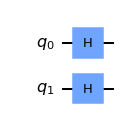

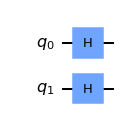

In [136]:
n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.h(1)

qc.draw('mpl')

## Implmenting the oracle

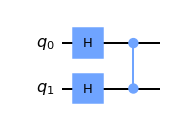

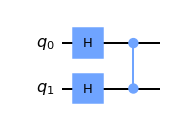

In [126]:
qc.cz(0,1)

qc.draw('mpl')

## Implementing the Diffusion operator

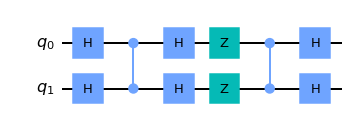

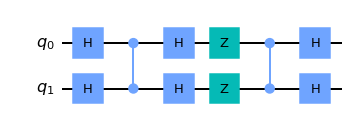

In [127]:
# Diffusion operator (U_s)
qc.h([0,1])
qc.z([0,1])
qc.cz(0,1)
qc.h([0,1])
qc.draw('mpl')

In [128]:
qc.measure_all()

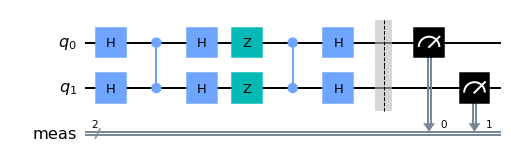

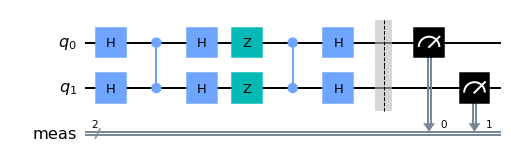

In [129]:
qc.draw('mpl')

In [130]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
qc_sim = qc.copy()
qc_sim.save_statevector()
qobj = assemble(qc_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()

# from qiskit_textbook.tools import vector2latex
# vector2latex(statevec, pretext="|\\psi\\rangle =")

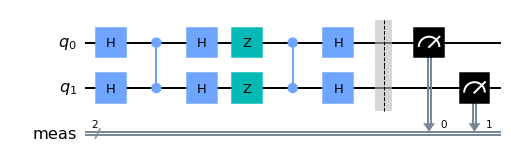

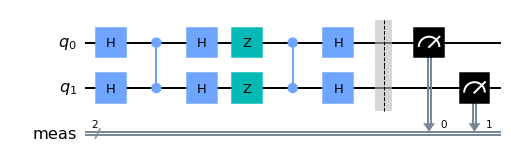

In [131]:
qc.draw('mpl')

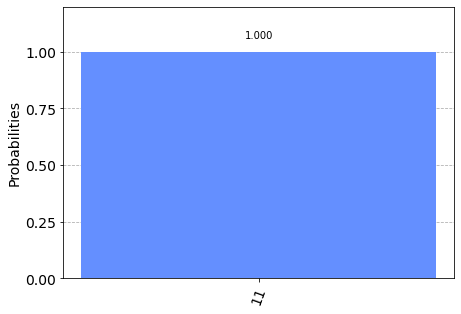

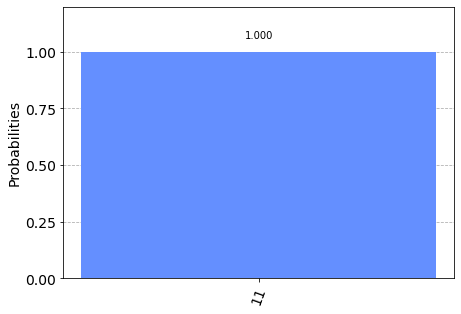

In [132]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)